# 11. 해외 주식 ETF

## 11.1 분석을 위한 기본 설정

### 11.1.1 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<br>

### 11.1.2 시각화를 위한 한글 폰트 설정

In [2]:
import platform

# 설정 가능한 그래프 스타일 확인
#print(plt.style.available)

# 그래프 스타일 설정 (seaborn-whitegrid)
plt.style.use('seaborn-whitegrid') # seaborn 스타일 설정은 폰트 설정 이전에 실행해야 한다.

# 한글 폰트 설정
from matplotlib import font_manager, rc

# 일반 폰트 설정
font_fname = ''
if 'Windows' in platform.system(): # 윈도우
    font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'
elif 'Darwin' in platform.system(): # 맥 OS
    font_fname = '' # 맥 OS 폰트 경로
elif 'Linux' in platform.system(): # 리눅스
    font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

# 마이너스 폰트 설정
rc('axes', unicode_minus=False)

# retina display 적용 (선명하게)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

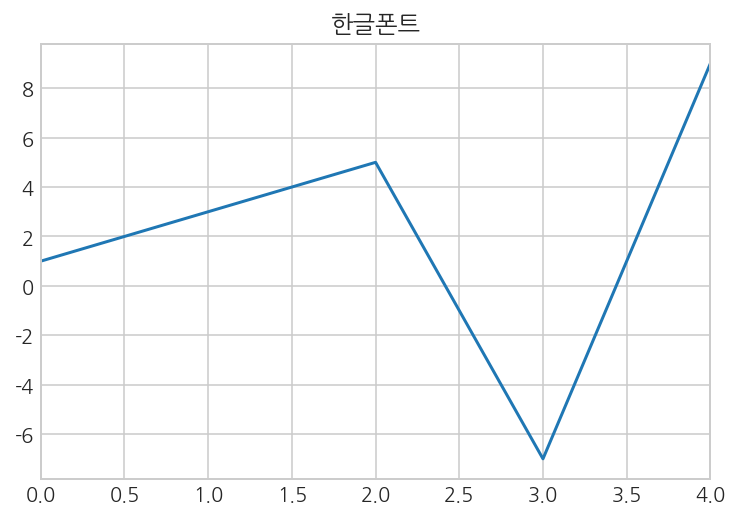

In [3]:
# 설정 확인
g = pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')

<br>

### 11.1.3 데이터 불러오기

In [4]:
df = pd.read_csv('etf_2021-02-03.csv', dtype={'종목코드': np.object})
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
0,069500,1,KODEX 200,43130,2,355,0.83,43214.0,39.9522,8521906,366352,62625,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,42970,2,360,0.84,43038.0,39.9710,1650818,70651,31347,국내 시장지수,TIGER,False,False,False
2,252670,3,KODEX 200선물인버스2X,2055,5,-35,-1.67,2051.0,-51.2821,642008913,1329284,20227,국내 파생,KODEX,True,False,False
3,122630,3,KODEX 레버리지,27825,2,475,1.74,28022.0,92.0646,46157932,1275107,19088,국내 파생,KODEX,False,True,False
4,102780,2,KODEX 삼성그룹,10530,2,70,0.67,10545.0,37.6315,612363,6415,18522,국내 업종/테마,KODEX,False,False,False


<br>

## 11.2 해외 주식 ETF 서브셋 생성

In [6]:
df['유형'].value_counts()

국내 업종/테마    174
해외 주식        97
국내 시장지수      64
채권           55
기타           34
국내 파생        31
원자재          14
Name: 유형, dtype: int64

In [7]:
oversea = df[df['유형'] == '해외 주식']

<br>

## 11.3 해외 주식 ETF 브랜드별 3개월 수익률 시각화

### 11.3.1 기본

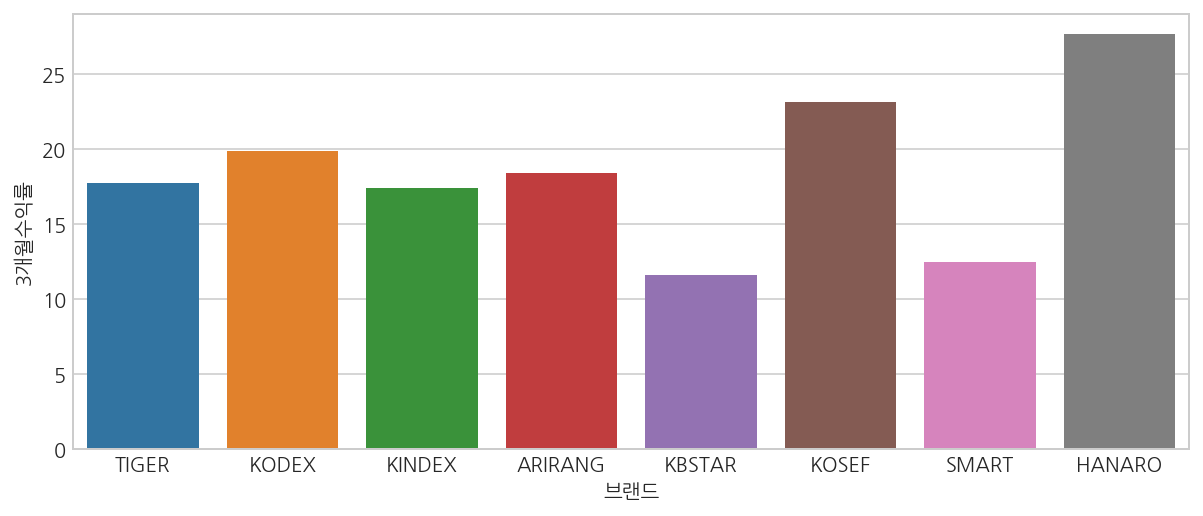

In [10]:
plt.figure(figsize=(10,4))
sns.barplot(data=oversea, x='브랜드', y='3개월수익률', ci=None)

<br>

### 11.3.2 `hue` 속성에 "환해지H" 지정

In [14]:
oversea.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
24,133690,4,TIGER 미국나스닥100,67650,2,1040,1.56,NaN,18.4493,118273,7975,6359,해외 주식,TIGER,False,False,False
29,371460,4,TIGER 차이나전기차SOLACTIVE,13660,2,210,1.56,NaN,NaN,2183188,29844,4393,해외 주식,TIGER,False,False,False
36,314250,4,KODEX 미국FANG플러스(H),27280,2,480,1.79,NaN,25.0583,340070,9245,3819,해외 주식,KODEX,False,False,True
37,251350,4,KODEX 선진국MSCI World,16945,2,150,0.89,NaN,16.6724,18646,315,3796,해외 주식,KODEX,False,False,False
39,192090,4,TIGER 차이나CSI300,12470,2,10,0.08,NaN,16.8307,579804,7238,3566,해외 주식,TIGER,False,False,False


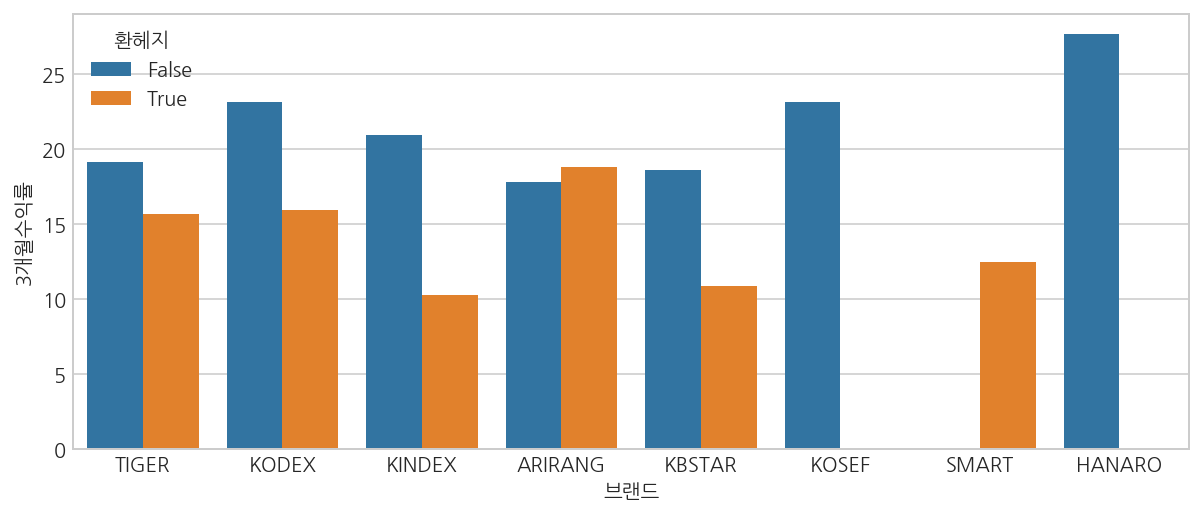

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(data=oversea, x='브랜드', y='3개월수익률', ci=None, hue='환헤지')

<br>

### 11.3.3 `violinplot`으로 시각화

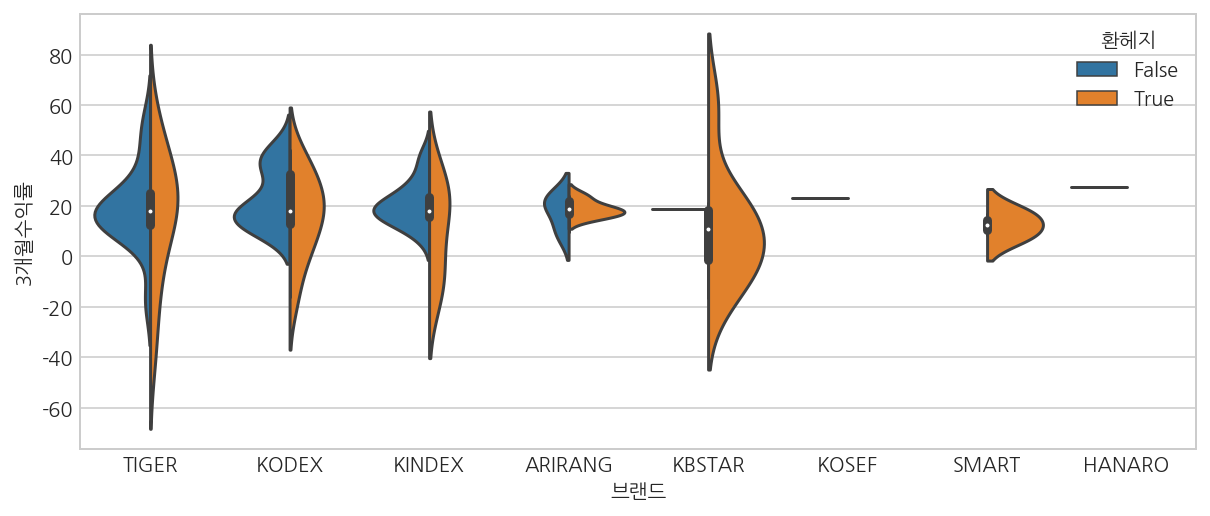

In [16]:
plt.figure(figsize=(10,4))
sns.violinplot(data=oversea, x='브랜드', y='3개월수익률', ci=None, hue='환헤지', split=True)

<br>

### 11.3.4 `catplot`을 통한 시각화

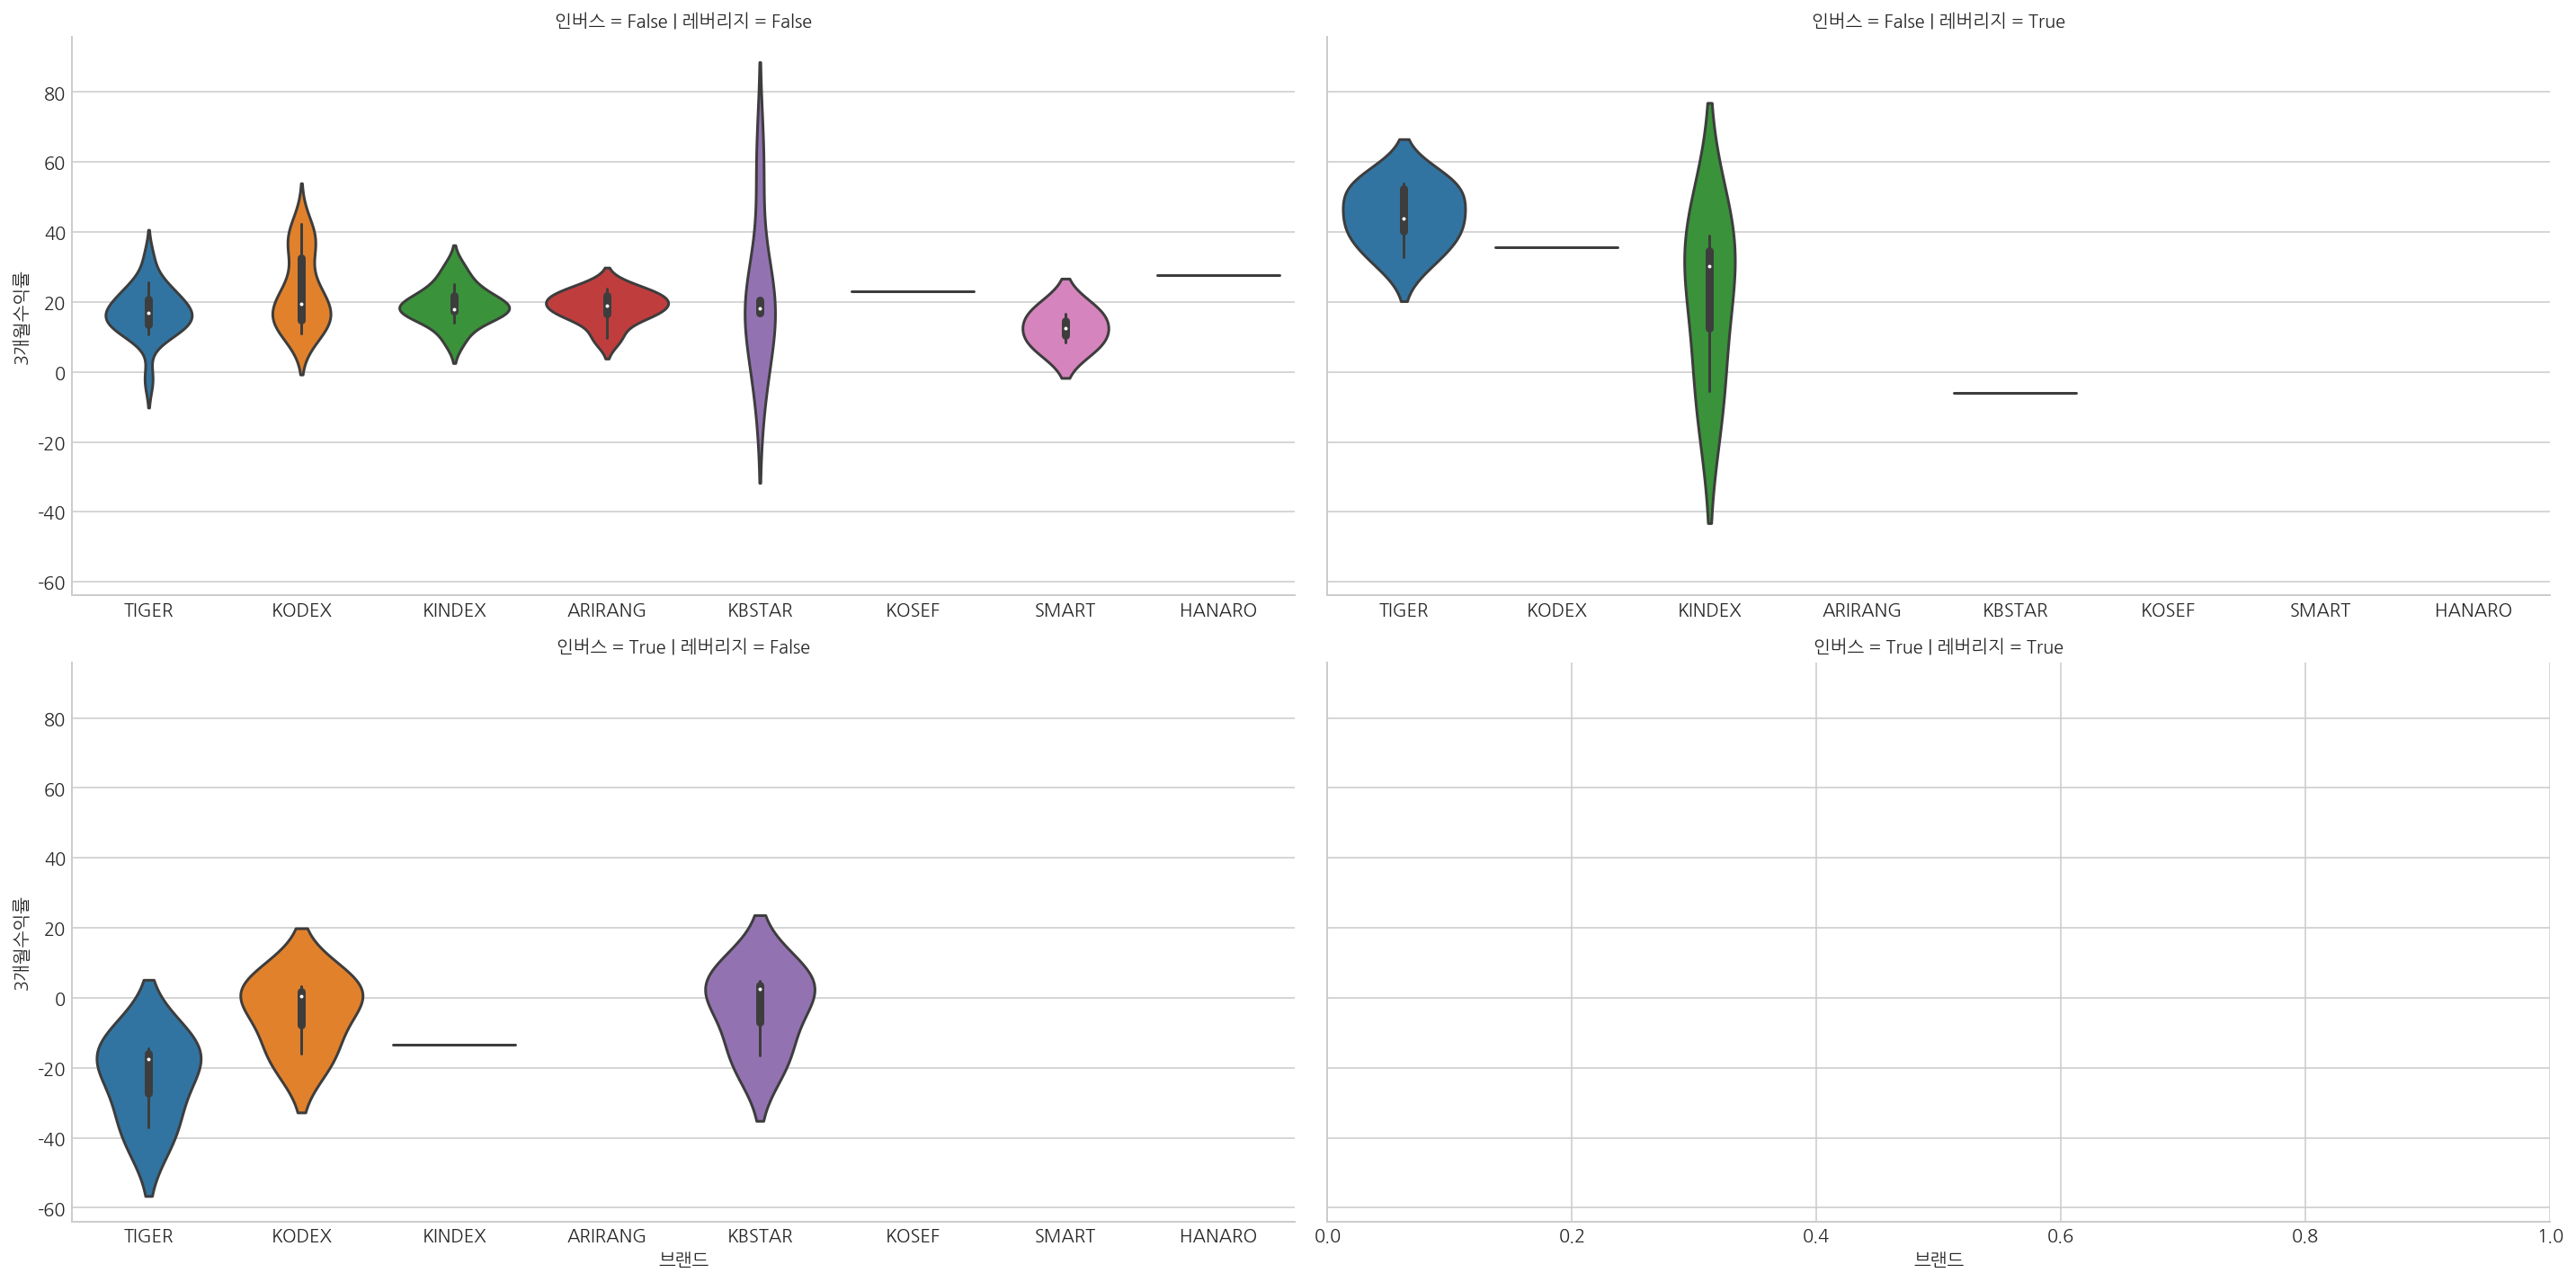

In [20]:
sns.catplot(data=oversea, x='브랜드', y='3개월수익률', kind='violin', col='레버리지', row='인버스', sharex=False, aspect=2)